In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [4]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
df['Embarked'].fillna('S', inplace=True)

In [6]:
new_df = pd.get_dummies(df, drop_first=True)

In [7]:
new_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


<AxesSubplot:>

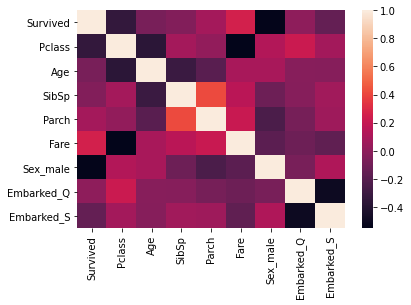

In [9]:
sns.heatmap(new_df.corr())

/home/amogh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/amogh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/amogh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/amogh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/amogh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


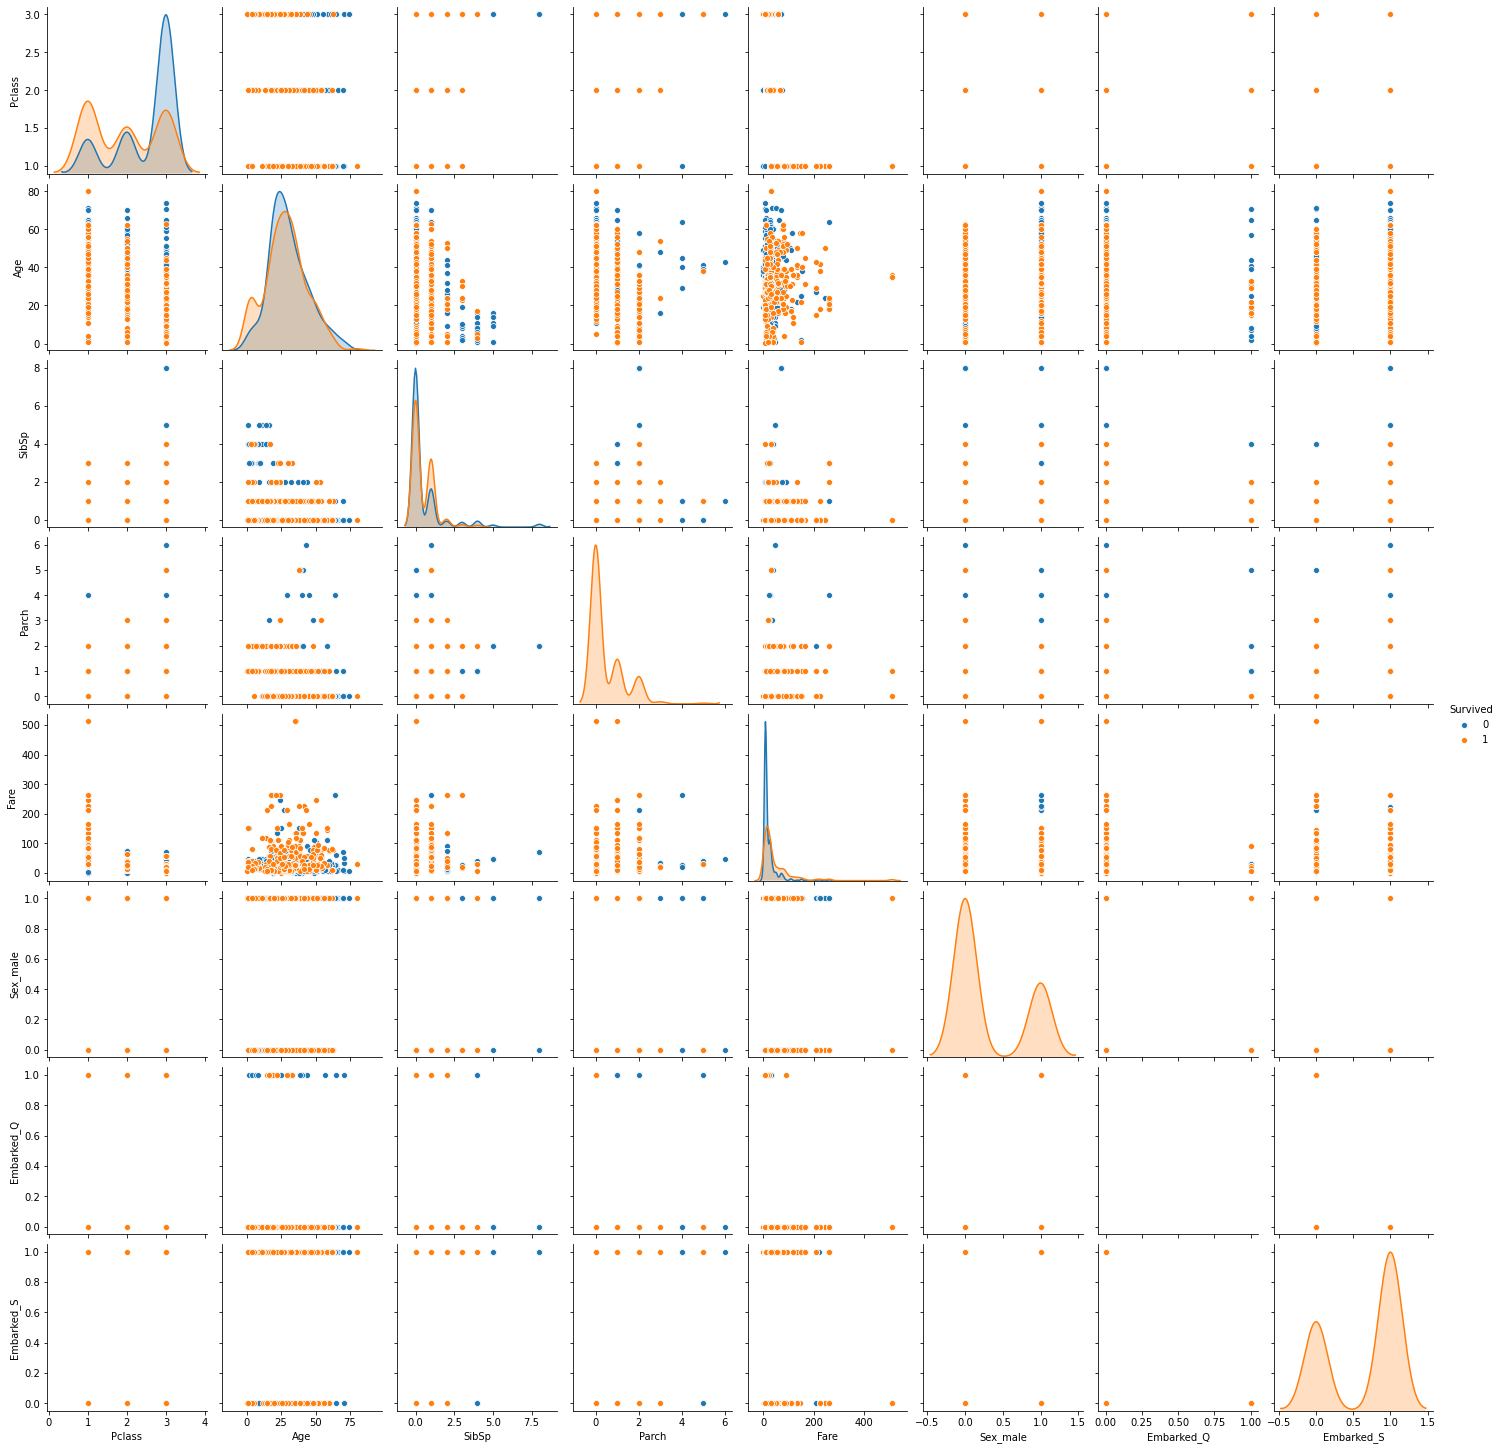

In [10]:
sns.pairplot(new_df, hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

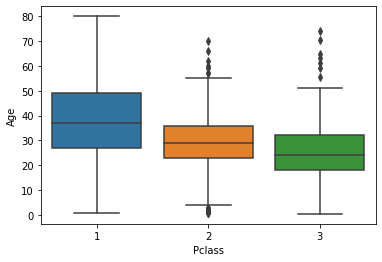

In [11]:
sns.boxplot(x='Pclass', y='Age', data=new_df)

In [12]:
new_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


<AxesSubplot:xlabel='Parch', ylabel='Age'>

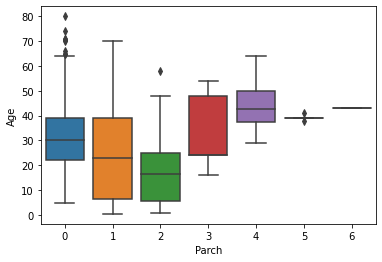

In [13]:
sns.boxplot(x='Parch', y='Age', data=new_df)

In [14]:
new_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
(new_df[new_df['Age'].isna()]['Pclass']==3).value_counts()

True     136
False     41
Name: Pclass, dtype: int64

In [16]:
new_df[new_df['Pclass']==1].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,216.000000,216.0,186.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,0.564815,0.009259,0.597222
std,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,0.496933,0.096001,0.491596
min,0.000000,1.0,0.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,27.000000,0.000000,0.000000,30.923950,0.000000,0.000000,0.000000
50%,1.000000,1.0,37.000000,0.000000,0.000000,60.287500,1.000000,0.000000,1.000000
75%,1.000000,1.0,49.000000,1.000000,0.000000,93.500000,1.000000,0.000000,1.000000
max,1.000000,1.0,80.000000,3.000000,4.000000,512.329200,1.000000,1.000000,1.000000


In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 30
        elif Pclass ==3:
            return 25
    
    else:
        return Age

In [18]:
new_df['Age'] = new_df[['Age', 'Pclass']].apply(impute_age, axis=1)

In [19]:
new_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,25.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [21]:
X = new_df.drop('Survived', axis=1)
y = new_df['Survived']

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [23]:
scaled_y = y.to_numpy()

In [24]:
params = {
    'kernel' : ['rbf'],
    'gamma': [0.01, 0.1, 0.5, 1, 1.5, 2, 2.5, 5, 10],
    'C': [0.001, 0.01, 0.5, 1, 1.5, 2, 2.5, 5, 10]
}

svm_clf = SVC()

In [25]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(svm_clf, param_grid=params, cv=5, scoring='accuracy')

In [26]:
search.fit(scaled_data, scaled_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.5, 1, 1.5, 2, 2.5, 5, 10],
                         'gamma': [0.01, 0.1, 0.5, 1, 1.5, 2, 2.5, 5, 10],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [27]:
search.best_estimator_

SVC(C=2, gamma=0.1)

In [28]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=2)
svm_clf.fit(scaled_data, scaled_y)

SVC(C=2, gamma=0.1)

In [29]:
test_data = pd.read_csv('test.csv')

In [30]:
test_data.drop('PassengerId', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [32]:
test_data['Age'] = test_data[['Age', 'Pclass']].apply(impute_age, axis=1)

In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [34]:
test_data['Fare'].fillna(20, inplace=True)

In [35]:
encoded_test = pd.get_dummies(test_data, drop_first=True)

In [36]:
scaler = StandardScaler()
scaled_test_data = scaler.fit_transform(encoded_test)

In [37]:
ans = svm_clf.predict(scaled_test_data)

In [38]:
from sklearn.model_selection import cross_val_score

svm_clf = SVC(kernel='rbf', gamma=0.1, C=2)
cross_val_score(svm_clf, scaled_data, scaled_y, cv=5, scoring='accuracy')

array([0.83798883, 0.8258427 , 0.81460674, 0.79213483, 0.88764045])

In [39]:
ans

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [40]:
t=0
for i in range(892, 1310):
    print(i, end="")
    print(",",end="")
    print(ans[t])
    t=t+1

892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,0
911,0
912,0
913,1
914,1
915,0
916,1
917,0
918,1
919,0
920,0
921,0
922,0
923,0
924,0
925,0
926,0
927,0
928,0
929,0
930,0
931,0
932,0
933,0
934,0
935,1
936,1
937,0
938,0
939,0
940,1
941,0
942,0
943,0
944,1
945,1
946,0
947,0
948,0
949,0
950,0
951,1
952,0
953,0
954,0
955,1
956,0
957,1
958,1
959,0
960,0
961,0
962,1
963,0
964,0
965,0
966,1
967,0
968,0
969,1
970,0
971,1
972,1
973,0
974,0
975,0
976,0
977,0
978,1
979,0
980,1
981,1
982,0
983,0
984,1
985,0
986,0
987,0
988,1
989,0
990,0
991,0
992,1
993,0
994,0
995,0
996,1
997,0
998,0
999,0
1000,0
1001,0
1002,0
1003,1
1004,1
1005,1
1006,1
1007,0
1008,0
1009,1
1010,0
1011,1
1012,1
1013,0
1014,1
1015,0
1016,0
1017,1
1018,0
1019,1
1020,0
1021,0
1022,0
1023,0
1024,0
1025,0
1026,0
1027,0
1028,0
1029,0
1030,0
1031,0
1032,0
1033,1
1034,0
1035,0
1036,0
1037,0
1038,0
1039,0
1040,0
1041,0
1042,1
1043,0
1044,0
1045,0
1046,0
1047,0
1048,1
1049,0
10

In [41]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy').mean()

0.7808627991726583

In [44]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
tree_ans = tree_clf.predict(scaled_test_data)

[Text(428.35314369391824, 793.9421052631578, 'X[5] <= 0.5\ngini = 0.474\nsamples = 712\nvalue = [437, 275]'),
 Text(199.58374875373877, 751.0263157894736, 'X[0] <= 2.5\ngini = 0.391\nsamples = 248\nvalue = [66, 182]'),
 Text(62.30907278165503, 708.1105263157895, 'X[1] <= 2.5\ngini = 0.1\nsamples = 132\nvalue = [7, 125]'),
 Text(40.05583250249252, 665.1947368421053, 'X[4] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(31.154536390827516, 622.2789473684211, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(48.957128614157526, 622.2789473684211, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(84.56231306081754, 665.1947368421053, 'X[4] <= 28.856\ngini = 0.088\nsamples = 130\nvalue = [6, 124]'),
 Text(66.75972083748754, 622.2789473684211, 'X[4] <= 28.231\ngini = 0.174\nsamples = 52\nvalue = [5, 47]'),
 Text(57.85842472582253, 579.3631578947368, 'X[1] <= 56.0\ngini = 0.145\nsamples = 51\nvalue = [4, 47]'),
 Text(35.60518444666002, 536.4473684210527, 'X[1] <= 37.0\ngini = 0.11

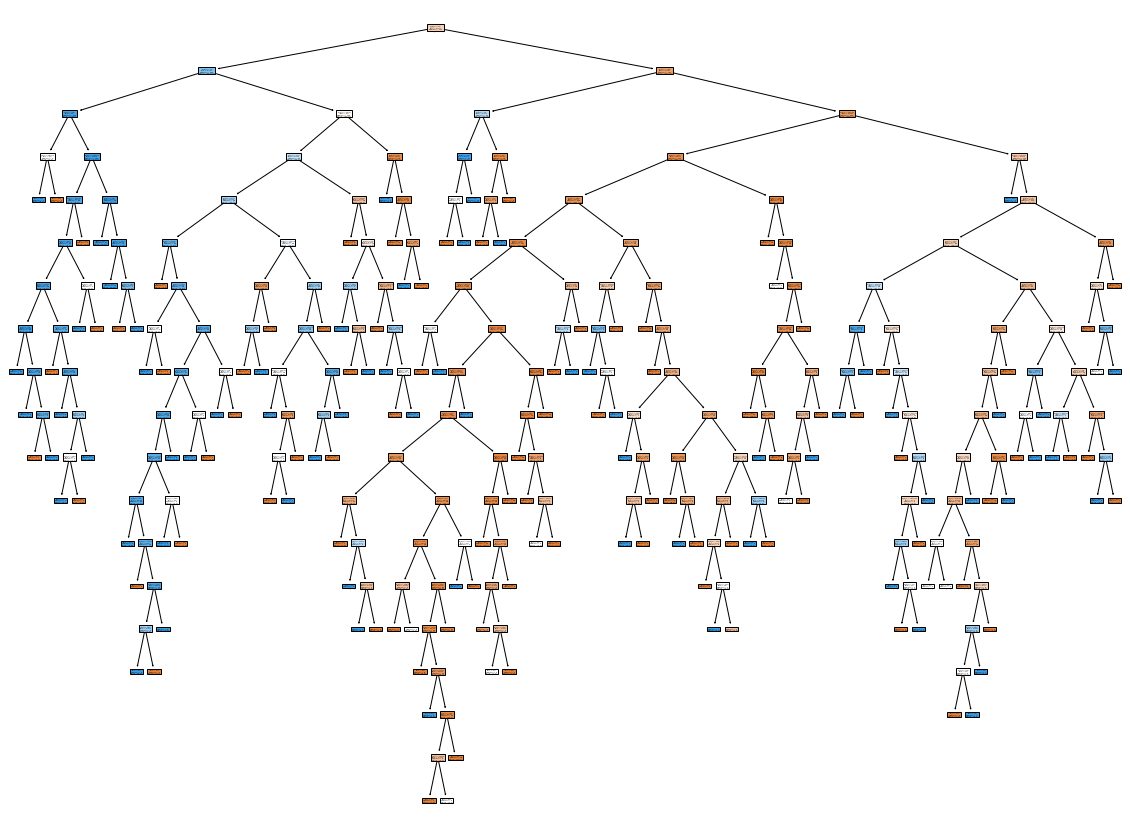

In [46]:
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(20,15))
tree.plot_tree(tree_clf, filled=True)

In [47]:
path = tree_clf.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [48]:
clfs=[]
for ccp_alpha in ccp_alphas:
    dec_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dec_tree.fit(X, y)
    clfs.append(dec_tree)
print("No. of nodes in the last tree is {} ,with ccp_alpha {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

No. of nodes in the last tree is 1 ,with ccp_alpha 0.13964795747285225


In [49]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

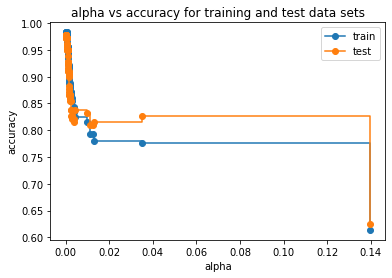

In [50]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('alpha vs accuracy for training and test data sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [51]:
final_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.005)

In [52]:
cross_val_score(final_tree, X_train, y_train, cv=5, scoring='accuracy').mean()

0.8201910765291046

[Text(472.15384615384613, 713.475, 'X[5] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(171.69230769230768, 509.625, 'X[0] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(85.84615384615384, 305.775, 'gini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(257.53846153846155, 305.775, 'X[4] <= 23.35\ngini = 0.5\nsamples = 144\nvalue = [72, 72]'),
 Text(171.69230769230768, 101.92499999999995, 'gini = 0.484\nsamples = 117\nvalue = [48, 69]'),
 Text(343.38461538461536, 101.92499999999995, 'gini = 0.198\nsamples = 27\nvalue = [24, 3]'),
 Text(772.6153846153845, 509.625, 'X[1] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(600.9230769230769, 305.775, 'X[2] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(515.0769230769231, 101.92499999999995, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(686.7692307692307, 101.92499999999995, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(944.3076923076923, 305.775, 'X[0] <= 1.5\ngini = 

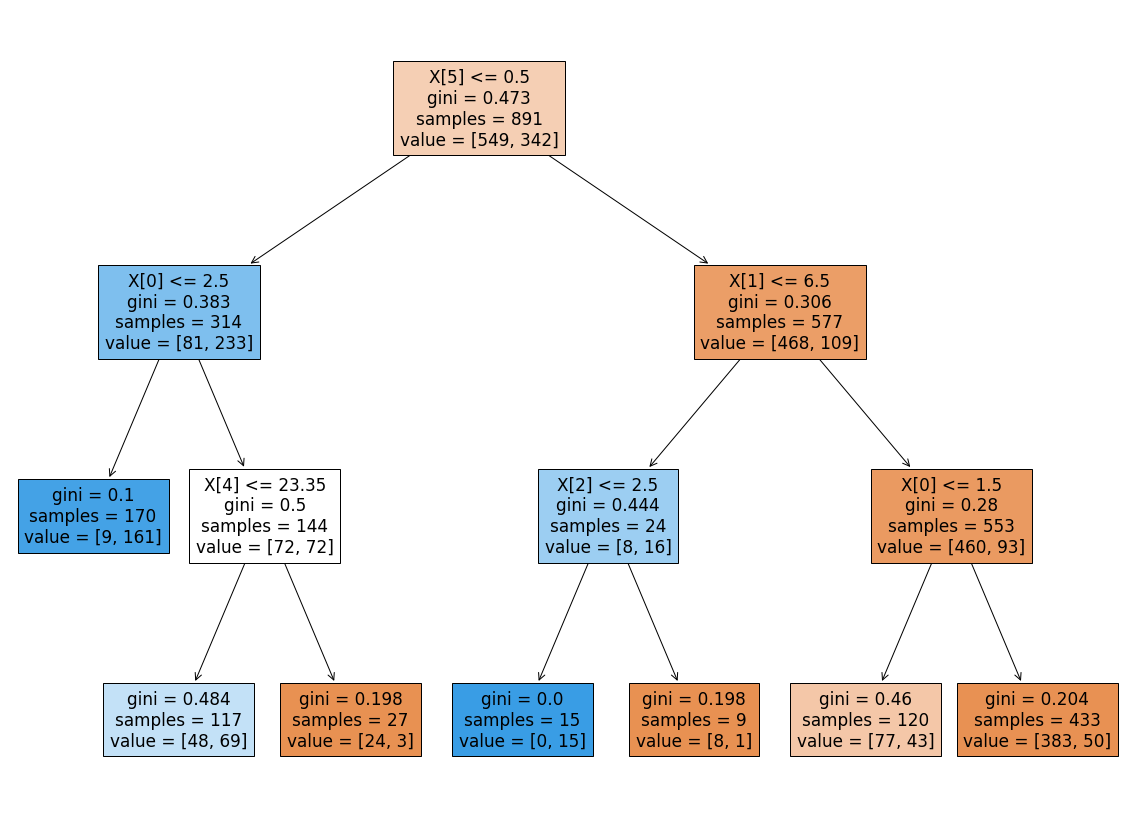

In [53]:
final_tree.fit(X, y)

plt.figure(figsize=(20,15))
tree.plot_tree(final_tree, filled=True)

In [54]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost

In [55]:
params={
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}

In [56]:
classifier = xgboost.XGBClassifier()

In [57]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [58]:
random_search.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    1.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.9s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [59]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
xgb_clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
cross_val_score(xgb_clf, X, y, cv=10, scoring='accuracy').mean()

0.8339700374531835

In [62]:
xgb_clf.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
xgb_ans = xgb_clf.predict(encoded_test)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [65]:
forest_reg = RandomForestClassifier()
log_reg = LogisticRegression(C=1.5, max_iter=1000, multi_class='multinomial',
                   solver='newton-cg')
svm_clf = SVC(kernel='rbf', gamma=0.1, C=2, probability=True)
tree_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.005)
xgb_clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
voting_clf = VotingClassifier(
                    estimators=[('lg', log_reg), ('svm', svm_clf), ('rf', forest_reg), ('dt', tree_clf), ('xgb', xgb_clf)],
                    voting='soft')

In [67]:
cross_val_score(voting_clf, X, y, cv=10, scoring='accuracy').mean()

0.8272034956304619

In [68]:
voting_clf.fit(X, y)

VotingClassifier(estimators=[('lg',
                              LogisticRegression(C=1.5, max_iter=1000,
                                                 multi_class='multinomial',
                                                 solver='newton-cg')),
                             ('svm', SVC(C=2, gamma=0.1, probability=True)),
                             ('rf', RandomForestClassifier()),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.005,
                                                     random_state=0)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1...
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                

In [69]:
voting_ans = voting_clf.predict(encoded_test)

In [70]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=0, ccp_alpha=0.005), 
                            n_estimators=10, max_samples=100, bootstrap=True, n_jobs=-1)

In [71]:
cross_val_score(bag_clf, X, y, cv=10, scoring='accuracy').mean()

0.8170786516853934

In [72]:
bag_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.005,
                                                        random_state=0),
                  max_samples=100, n_jobs=-1)

In [73]:
bag_ans = bag_clf.predict(encoded_test)

In [74]:
forest_clf = RandomForestClassifier(n_estimators=100, ccp_alpha=0.005, n_jobs=-1)

In [75]:
cross_val_score(forest_clf, X, y, cv=10, scoring='accuracy').mean()

0.8271785268414481

In [76]:
forest_clf.fit(X, y)

RandomForestClassifier(ccp_alpha=0.005, n_jobs=-1)

In [77]:
forest_ans = forest_clf.predict(encoded_test)

In [78]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter='random',random_state=0, ccp_alpha=0.005), 
                             n_estimators=10, max_samples=100, bootstrap=True, n_jobs=-1)

In [79]:
cross_val_score(bag_clf, X, y, cv=10, scoring='accuracy').mean()

0.8159550561797753

In [80]:
forest_reg = RandomForestClassifier(n_estimators=500, ccp_alpha=0.005, n_jobs=-1)
log_reg = LogisticRegression(C=1.5, max_iter=1000, multi_class='multinomial',
                   solver='newton-cg')
svm_clf = SVC(kernel='rbf', gamma=0.1, C=2, probability=True)
tree_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.005)
xgb_clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)



voting_clf = VotingClassifier(
                    estimators=[('lg', log_reg), ('svm', svm_clf), ('rf', forest_reg), ('dt', tree_clf), ('xgb', xgb_clf)],
                    voting='soft')

In [81]:
cross_val_score(voting_clf, X, y, cv=10, scoring='accuracy').mean()

0.8272034956304619

In [82]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
                            DecisionTreeClassifier(random_state=0, ccp_alpha=0.009), n_estimators=200,
                            algorithm='SAMME.R', learning_rate=0.1)

In [83]:
cross_val_score(ada_clf, X, y, cv=10, scoring='accuracy').mean()

0.8170661672908863

In [84]:
ada_clf.fit(X, y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.009,
                                                         random_state=0),
                   learning_rate=0.1, n_estimators=200)

In [85]:
ada_ans = ada_clf.predict(encoded_test)

In [97]:
params={
    'n_estimators': [20, 50, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'max_depth': [4, 5, 7, 10]
}

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()

In [103]:
grid_search = GridSearchCV(gb_clf, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1)

In [104]:
grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_depth': [4, 5, 7, 10],
                         'n_estimators': [20, 50, 100, 200, 500]},
             scoring='accuracy')

In [105]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [106]:
grid_search.best_score_

0.8282828282828283

In [151]:
gb_clf = GradientBoostingClassifier(learning_rate=0.05, subsample=0.3, max_depth=5, n_estimators=100)

In [152]:
cross_val_score(gb_clf, X, y, cv=10, scoring='accuracy').mean()

0.8328089887640449

In [153]:
gb_clf.fit(X, y)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, subsample=0.3)

In [154]:
gb_ans = gb_clf.predict(encoded_test)

In [155]:
t=0
for i in range(892, 1310):
    print(i, end='')
    print(',', end='')
    print(gb_ans[t])
    t=t+1

892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,1
911,0
912,0
913,1
914,1
915,1
916,1
917,0
918,1
919,0
920,1
921,0
922,0
923,0
924,0
925,0
926,1
927,0
928,0
929,0
930,0
931,1
932,0
933,0
934,0
935,1
936,1
937,0
938,0
939,0
940,1
941,1
942,0
943,0
944,1
945,1
946,0
947,0
948,0
949,0
950,0
951,1
952,0
953,0
954,0
955,1
956,0
957,1
958,1
959,0
960,0
961,1
962,1
963,0
964,1
965,0
966,1
967,0
968,0
969,1
970,0
971,1
972,1
973,0
974,0
975,0
976,0
977,0
978,1
979,0
980,1
981,1
982,0
983,0
984,1
985,0
986,1
987,0
988,1
989,0
990,1
991,0
992,1
993,0
994,0
995,0
996,0
997,0
998,0
999,0
1000,0
1001,0
1002,0
1003,1
1004,1
1005,1
1006,1
1007,0
1008,0
1009,1
1010,1
1011,1
1012,1
1013,0
1014,1
1015,0
1016,0
1017,1
1018,0
1019,1
1020,0
1021,0
1022,0
1023,0
1024,0
1025,0
1026,0
1027,0
1028,0
1029,0
1030,0
1031,0
1032,0
1033,1
1034,0
1035,0
1036,1
1037,0
1038,0
1039,0
1040,0
1041,0
1042,1
1043,0
1044,0
1045,0
1046,0
1047,0
1048,1
1049,1
10